In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import lambertw
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

9.89853996535511e-05
[365]
365
364.05368000807994
365


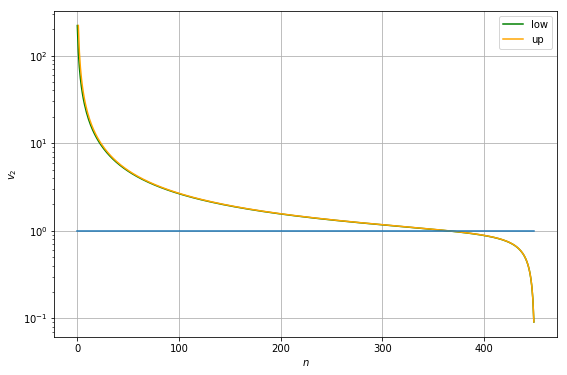

In [39]:
# some givens
slack_B_div_beta = 10
N = 450
C0 = 1.0
print(slack_B_div_beta / ((N*(N-1))/2))

n = np.arange(int(N))
n_bis = np.arange(1,int(N))
k = np.arange(int(N))

C_2 = np.sqrt(C0)*(N+1+n)/(2*N*(1+slack_B_div_beta/(N-n)))
v_2 = C_2 * N/(1+k) / np.sqrt(C0)
v_2_bis = C_2[1:] * N/n_bis / np.sqrt(C0)
indices_2 = n[v_2>0]
ok_indices_2 = k[(v_2<=1) & (v_2>0)]
indices_2_bis = n_bis[v_2_bis>0]
ok_indices_2_bis = n_bis[(v_2_bis>1)]


print(np.intersect1d(ok_indices_2,ok_indices_2_bis))
print(ok_indices_2[0])
Nb_prop = np.ceil(N - (np.sqrt(4*slack_B_div_beta*(2*N+1+slack_B_div_beta)) - (2*slack_B_div_beta - 1))/2)
print(N - (np.sqrt(4*slack_B_div_beta*(2*N+1+slack_B_div_beta)) - (2*slack_B_div_beta - 1))/2)
print(int(np.max((0,np.min((N-1,Nb_prop))))))
plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$v_2$')
plt.semilogy(indices_2,v_2[v_2>0],color='green')
plt.semilogy(indices_2_bis,v_2_bis[v_2_bis>0],color='orange')
plt.semilogy(indices_2,np.ones(len(indices_2)))
plt.legend(['low','up']);

In [38]:
# fun practical
def Nb_ana(slack_B_div_beta,N=450.0,C0=1.0):
    Nb_prop = np.ceil(N - (np.sqrt(4*slack_B_div_beta*(2*N+1+slack_B_div_beta)) - (2*slack_B_div_beta - 1))/2)
    return int(np.max((0,np.min((N-1,Nb_prop)))))

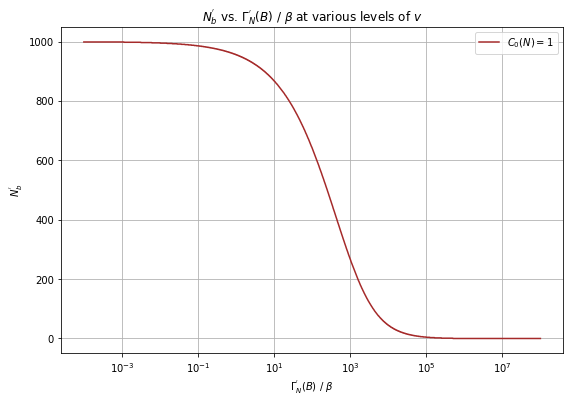

In [42]:
N = 1000.0

plt.figure(figsize=(9,6))

plt.grid()

plt.title('$N_b^{\'}$ vs. $\Gamma^{\'}_N(B)$ / '+r'$\beta$'+' at various levels of $v$')

vector2 = np.logspace(-4,8,2000)

C0 = 1

vals_threshold = np.array([Nb_ana(slack_elem,N,C0) for slack_elem in vector2])
plt.semilogx(vector2,vals_threshold,color='brown');



plt.legend(['$C_0(N)= 1$'])
plt.xlabel('$\Gamma^{\'}_N(B)$ / '+r'$\beta$')
plt.ylabel('$N_b^{\'}$');
plt.savefig('Nb22_log.pdf')

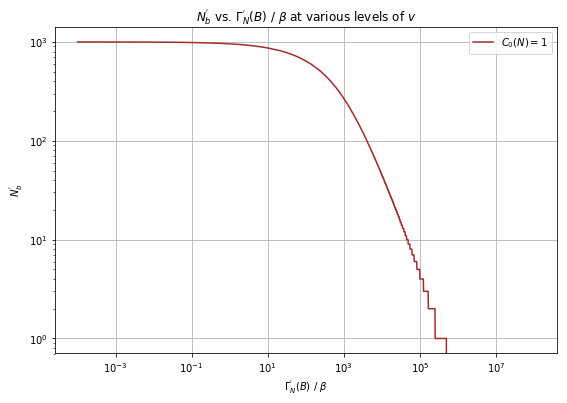

In [43]:
N = 1000.0

plt.figure(figsize=(9,6))

plt.grid()

plt.title('$N_b^{\'}$ vs. $\Gamma^{\'}_N(B)$ / '+r'$\beta$'+' at various levels of $v$')

vector2 = np.logspace(-4,8,2000)

C0 = 1

vals_threshold = np.array([Nb_ana(slack_elem,N,C0) for slack_elem in vector2])
plt.loglog(vector2,vals_threshold,color='brown');


plt.legend(['$C_0(N)= 1$'])
plt.xlabel('$\Gamma^{\'}_N(B)$ / '+r'$\beta$')
plt.ylabel('$N_b^{\'}$');
plt.savefig('Nb22_loglog.pdf')

best FGD: 0.04016666666666667 at 10
best FGD constant: 0.045666666666666675
relative gain at N = 800 : 20.97457324604619 %
FGD constant at best: 0.04719559228650138
 
q-measure: 0.005500000000000005
relative q-measure: 12.043795620437969 %
relative unfair q-measure: 14.893182348820922 %
 


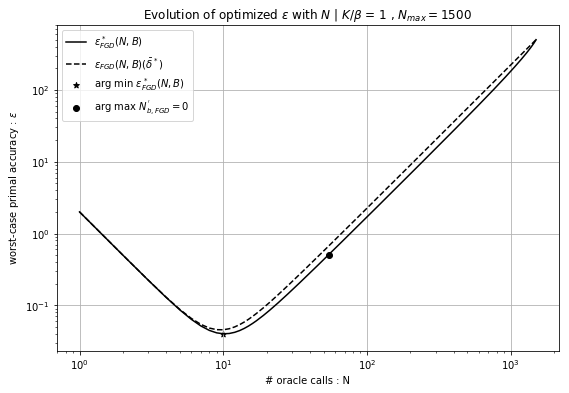

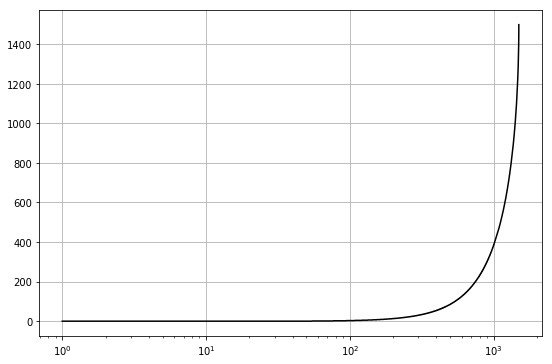

In [52]:
K_div_beta = 1
N_max = 1500
multi = 0.5

N_interest = int(800)

plt.figure(figsize=(9,6))

plt.grid()

vector_N = np.arange(N_max)+1

C0 = lambda N: 1
gamma = lambda N: 1
div = lambda N: N**2 / 4

vals_threshold = np.array([Nb_ana(K_div_beta*(N_max-N_elem),N_elem,C0(N_elem)) for N_elem in vector_N])

epsilon_list = []
Nb_prime_list_FGD = []
epsilon_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0
value_FGD_interest = np.inf
value_FGD_interest_constant = np.inf

for index_N in np.arange(len(vector_N)):
    
    N = vector_N[index_N]
    Nb_prime = int(vals_threshold[index_N])
    Nb_prime_list_FGD.append(Nb_prime)
    k = np.arange(int(N))
    k_prime = np.arange(Nb_prime,int(N))
    C = np.sqrt(C0(N))*(N+1+Nb_prime)/(2*N*(1+K_div_beta*(N_max-N)/(N-Nb_prime)))
    delta_sched = np.concatenate((np.ones(Nb_prime),C/np.sqrt(C0(N))*N/(1+k_prime)),axis=0)
    conv_term = gamma(N)*multi/div(N)
    value = conv_term + np.sum(C0(N)*(1+k)**2 / N**2 * delta_sched)
    epsilon_list.append(value)
    bar_delta = 1/(1+(K_div_beta*(N_max-N)/N))
    bar_delta_list.append(bar_delta)
    value_constant =  conv_term + np.sum(C0(N)*(1+k)**2 / N**2 *bar_delta)
    epsilon_list_constant.append(value_constant)
    if Nb_prime>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = epsilon_list[-2]
    if N==N_interest:
        value_FGD_interest = value
        value_FGD_interest_constant = value_constant    
    
N_best = vector_N[np.argmin(np.array(epsilon_list))]
plt.loglog(vector_N,np.array(epsilon_list),color='black')
plt.loglog(vector_N,np.array(epsilon_list_constant),color='black',linestyle='--');
plt.scatter([N_best],[np.min(np.array(epsilon_list))],color='black',marker='*')
plt.scatter([N_pre_switch],[value_pre_switch],color='black',marker='o');
best_FGD = np.min(np.array(epsilon_list))
best_FGD_constant = np.min(epsilon_list_constant)
FGD_constant_at_best = epsilon_list_constant[N_best]
print('best FGD: '+str(best_FGD)+' at '+str(N_best))
print('best FGD constant: '+str(best_FGD_constant))
print('relative gain at N = '+str(N_interest)+' : '+str(100*(1-value_FGD_interest/value_FGD_interest_constant))+' %')
print('FGD constant at best: '+str(FGD_constant_at_best))
print(' ')
print('q-measure: '+str(best_FGD_constant-best_FGD))
print('relative q-measure: '+str(100*(1-best_FGD/best_FGD_constant))+' %')
print('relative unfair q-measure: '+str(100*(1-best_FGD/FGD_constant_at_best))+' %')
print(' ')

plt.title('Evolution of optimized $\epsilon$ with $N$ | $K / $'+r'$\beta$ = '+str(K_div_beta)+' , $N_{max} = $'+str(N_max))
plt.xlabel('# oracle calls : N')
plt.ylabel('worst-case primal accuracy : $\epsilon$')
plt.legend(['$\epsilon_{FGD}^*(N,B)$','$\epsilon_{FGD}(N,B)'+r'(\bar{\delta}^*)$',\
            'arg min $\epsilon^*_{FGD}(N,B)$','arg max $N_{b,FGD}^{\'}=0$']);
plt.savefig('results22_'+'KdivBeta'+str(K_div_beta)+'Nmax'+str(N_max)+'.pdf')

plt.figure(figsize=(9,6))
plt.semilogx(vector_N,Nb_prime_list_FGD,color='black')
plt.grid();